**Storytelling - analiza danych o COVID-19**

In [13]:
import pandas
import datetime
from matplotlib import pyplot
import matplotlib.dates as dates
import ipywidgets
from IPython.display import display, HTML

In [14]:
data_file_path = "time-series-19-covid-combined.csv"
covid_data = pandas.read_csv(data_file_path)

In [15]:
temp_covid_data = covid_data.sort_values(by=["Date"], ascending=False)
last_date = temp_covid_data.Date.iloc[0]

covid_last_data = covid_data[covid_data['Date'] == last_date]
covid_poland_data = covid_data[covid_data["Country/Region"] == "Poland"]
covid_poland_last_data = covid_last_data[covid_data["Country/Region"] == "Poland"]

<ipython-input-15-4cf979bde3ba>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_poland_last_data = covid_last_data[covid_data["Country/Region"] == "Poland"]


In [16]:
x = covid_poland_data.Date.tolist()
prepared_x = [datetime.datetime.strptime(d, "%Y-%m-%d").date() for d in x]
y = covid_poland_data["Confirmed"]

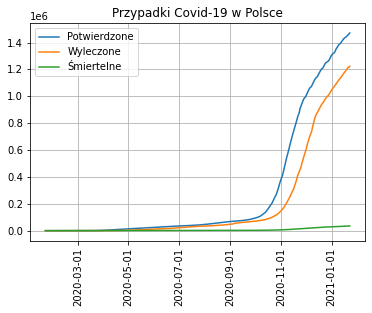

In [17]:
ax = pyplot.gca()
pyplot.xticks(rotation="vertical")
pyplot.grid()
date_formatter = dates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_formatter)
pyplot.plot(prepared_x,covid_poland_data["Confirmed"])
pyplot.plot(prepared_x, covid_poland_data["Recovered"])
pyplot.plot(prepared_x, covid_poland_data["Deaths"])
pyplot.legend(["Potwierdzone", "Wyleczone", "Śmiertelne"])
pyplot.title("Przypadki Covid-19 w Polsce")
pyplot.show()

In [19]:
display(ipywidgets.Label("Przypadki COVID-19 na świecie"))
display(ipywidgets.Label("----------"))
for case in ["Confirmed", "Recovered", "Deaths"]:
    display(ipywidgets.Label(case + ": " + str(int(covid_last_data[case].sum()))))

Label(value='Przypadki COVID-19 na świecie')

Label(value='----------')

Label(value='Confirmed: 98744267')

Label(value='Recovered: 53772302')

Label(value='Deaths: 2120578')

In [20]:
data_types = ["Confirmed", "Recovered", "Deaths"]
content = ["Polska: " + str(int(covid_poland_last_data[data_type])) + "\r\nŚwiat: " + str(int(covid_last_data.sum()[data_type])) for data_type in data_types]
content = [ipywidgets.Label(name) for name in content]
tab = ipywidgets.Tab()
tab.children = content
for i in range(len(data_types)):
    tab.set_title(i, data_types[i])
tab

In [21]:
total_cases = covid_last_data[["Country/Region", "Province/State", "Confirmed", "Recovered", "Deaths"]]
display(HTML(total_cases.to_html()))

,Country/Region,Province/State,Confirmed,Recovered,Deaths
367,Afghanistan,NaN,54559,46943.0,2373
735,Albania,NaN,71441,43384.0,1310
1103,Algeria,NaN,105369,71755.0,2861
1471,Andorra,NaN,9499,8588.0,96
1839,Angola,NaN,19367,17249.0,457
2207,Antigua and Barbuda,NaN,195,162.0,6
2575,Argentina,NaN,1862192,1646668.0,46737
2943,Armenia,NaN,165909,154535.0,3034
3311,Australia,Australian Capital Territory,118,115.0,3
3679,Australia,New South Wales,5087,3237.0,54
